# NNDL HW2
## sajjad pakdaman savoji
### 810195517

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sgn(x):
    return x>= 0

In [3]:
np.random.seed(3)
blue_x = np.array([0, 1, 1, 2, 2, 2, 3, 3, 4, 4])
blue_y = np.array([2, 1, 3.5, 1, 2, 3, 1, 4, 2, 4])
blue_b = np.ones(10)


orange_x =  np.random.normal(3, 0.2, 50)
orange_y =  np.random.normal(2.5 , 0.3, 50)
orange_b =  np.ones(50)

green_x =  np.random.normal(1, 0.2, 50)
green_y =  np.random.normal(2, 0.3, 50)
green_b =  np.ones(50)

Blue = np.stack((blue_x, blue_y, blue_b), axis=1)
Orange = np.stack((orange_x, orange_y, orange_b), axis=1)
Green = np.stack((green_x, green_y, green_b), axis=1)

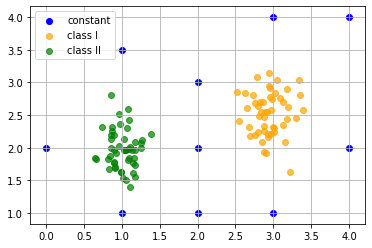

In [4]:
plt.scatter(Blue[: , 0]  ,Blue[:, 1], label = 'constant', c='blue')
plt.scatter(Orange[: , 0]  ,Orange[:, 1], label = 'class I', c = 'orange' , alpha=0.7)
plt.scatter(Green[: , 0]  ,Green[:, 1], label = 'class II', c = 'green', alpha= 0.7)
plt.legend()
plt.grid()

In [5]:
blue_target = np.atleast_2d([0 for i in range(10)]).T
orange_target = np.atleast_2d([1 for i in range(50)]).T
green_target = np.atleast_2d([-1 for i in range(50)]).T

Data   = np.vstack((Blue, Orange, Green))
target = np.vstack((blue_target, orange_target, green_target))

In [6]:
def sign(x):
    return 2*(x>0)-1

class PNeuron(object):
    def __init__(self, act_function, W, lr = 0.2, max_epoch = 10000):
        self.act = act_function
        self.W = W
        self.lr = lr
        self.max_epoch = max_epoch
        self.count = 0

    def out(self, Data):
        return self.act(np.dot(Data, self.W))
    
    def is_fit(self, Data, target):
        if self.count >= self.max_epoch:
            return True
        res = self.out(Data).reshape(target.shape)
        return np.array_equal(res, target)

    def update(self, Data, target):
        mask = [i for i in range(Data.shape[0])]
        # np.random.shuffle(mask)
        for sample in mask:
            if not self.out(Data[sample, :]) == target[sample, :][0]:
                self.W = self.W + self.lr * target[sample, :] * Data[sample, :]
        self.count += 1

    def get_weights(self):
        return self.W
        

In [7]:
class Adeline(PNeuron):
    def __init__(self, act_function, W, lr = 0.01, max_epoch = 100000):
        super().__init__(act_function, W, lr = lr, max_epoch = max_epoch)
        # self.best_cost = float('inf')
        # self.best_w = None

    def update(self, Data, target):
        mask = [i for i in range(Data.shape[0])]
        # np.random.shuffle(mask)
        for sample in mask:
                self.W = self.W + self.lr * (target[sample, :][0] - self.net(Data[sample, :]))* Data[sample, :]
        self.count += 1

        # res = self.out(Data).reshape(target.shape)
        # cost = np.square(np.subtract(res,target)).mean() 
        # if cost < self.best_cost:
        #     self.best_cost = cost
        #     self.best_w = self.W
        
    def is_fit(self, Data, target):
        if self.count >= self.max_epoch:
            return True
        return False
    
    def net(self, Data):
        return np.dot(Data, self.W)

    def get_weights(self):
        return self.W

In [8]:
class Madeline(object):
    def __init__(self, n , p, lr = 0.005, max_epoch = 5000):
        '''
            madeline with constant and-logic
            n is dim of feature vector
            p is degree of convex polygon
        '''
        
        self.n = n
        self.p = p
        self.lr = lr
        self.adelines = [Adeline(sgn, np.random.normal(0, 2, self.n), self.lr, float('inf')) for _ in range(self.p)]
        self.max_epoch = max_epoch
        self.reset()

    def reset(self, lr = None, max_epoch = None):
        self.is_fit = False
        self.epoch = 0

        if lr is not None: self.lr = lr
        if max_epoch is not None: self.max_epoch = max_epoch

    def update(self, Data, target):
        '''
        targets should be provided as 1 and 0
        '''
        self.is_fit = True
        mask = [i for i in range(Data.shape[0])]
        # np.random.shuffle(mask)
        for sample in mask:
                hidden = [a.out(Data[sample]) == 1 for a in self.adelines]
                # print(hidden)
                # print(target[0])
                res = 1
                for h in hidden: res = res and h
                # print(res)
                if not res == target[sample]:
                    self.is_fit = False
                    if target[sample] == 1:
                        for i , h in enumerate(hidden):
                            if h == 0: self.adelines[i].update(Data[sample].reshape(1, self.n), np.array(1).reshape(1, 1))
                    else:
                        i_min_conf = np.argmin(hidden)
                        self.adelines[i_min_conf].update(Data[sample].reshape(1, self.n), np.array(-1).reshape(1, 1))
        self.epoch += 1
        if self.epoch >= self.max_epoch:
            print('max epoch reached')
            self.is_fit = True

    def predict(self, Data):
        pred = []
        mask = [i for i in range(Data.shape[0])]
        for sample in mask:
                hidden = [a.out(Data[sample]) == 1 for a in self.adelines]
                res = 1
                for h in hidden: res = res and h
                pred.append(res)
        return np.array(pred)
        


In [9]:
net_o = Madeline(3, 10)

In [10]:
net_o.reset(lr=0.1, max_epoch=5000)
while not net_o.is_fit:
    net_o.update(Data, target == 1)

[-0.30286794  0.56502987  0.07814262]
[0.96705757 1.53793032 2.73248569]
[ 2.29452959 -0.22045831  0.77650083]
[-0.40602076 -0.83118735  3.94272943]
[-0.9196923   3.98147562 -0.69807079]
[0.50565018 2.1788191  0.04784404]
[ 0.84540767 -0.41850338 -0.92883261]
[-0.04418392 -1.0247478   3.35782177]
[-0.13094655  3.54838037 -5.30681778]
[ 0.03684159  1.12390334 -0.58764248]


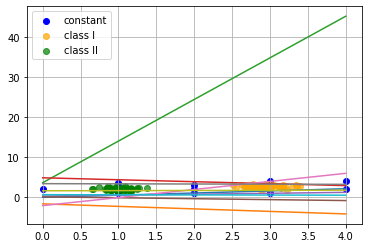

In [11]:
plt.scatter(Blue[: , 0]  ,Blue[:, 1], label = 'constant', c='blue')
plt.scatter(Orange[: , 0]  ,Orange[:, 1], label = 'class I', c = 'orange' , alpha=0.7)
plt.scatter(Green[: , 0]  ,Green[:, 1], label = 'class II', c = 'green', alpha= 0.7)

for a in net_o.adelines:
    w_star = a.W 
    print(w_star)
    x1 = 0
    y1 = (-w_star[2]-w_star[0]*x1)/w_star[1]

    x2 = 4
    y2 = (-w_star[2]-w_star[0]*x2)/w_star[1]
    plt.plot([x1 , x2], [y1, y2])


plt.legend()
plt.grid()

In [12]:
net_g = Madeline(3, 10)

In [13]:
net_g.reset(lr=0.1, max_epoch=5000)
while not net_g.is_fit:
    net_g.update(Data, target == -1)

[ 2.18930616  1.27938471 -0.54920024]
[0.87001852 5.62375675 0.50399025]
[ 0.79903439 -0.41089209  0.48213987]
[-2.57852239 -0.39658051  4.91517525]
[2.1344311  1.28284131 2.20784333]
[3.76350998 1.18717623 4.14175705]
[2.13959672 0.33303902 3.43895311]
[-3.34165527  1.3569002   1.83364699]
[-1.00269313  1.16345489 -0.48779843]
[-1.30883042  5.42385267  1.25494778]


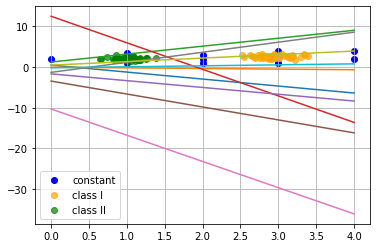

In [14]:
plt.scatter(Blue[: , 0]  ,Blue[:, 1], label = 'constant', c='blue')
plt.scatter(Orange[: , 0]  ,Orange[:, 1], label = 'class I', c = 'orange' , alpha=0.7)
plt.scatter(Green[: , 0]  ,Green[:, 1], label = 'class II', c = 'green', alpha= 0.7)

for a in net_g.adelines:
    w_star = a.W 
    print(w_star)
    x1 = 0
    y1 = (-w_star[2]-w_star[0]*x1)/w_star[1]

    x2 = 4
    y2 = (-w_star[2]-w_star[0]*x2)/w_star[1]
    plt.plot([x1 , x2], [y1, y2])


plt.legend()
plt.grid()

In [37]:
def make_grid_data(x_lower = -1, x_upper = +5, y_lower = 0, y_upper = +5, eps = None):
    if eps is None:
        d = max(x_upper - x_lower, y_upper-y_lower)
        eps = d/300
    x = np.arange(x_lower, x_upper, eps)
    y = np.arange(y_lower, y_upper, eps)

    X, Y = np.meshgrid(x,y)
    X_flat = X.reshape(-1, 1)
    Y_flat = Y.reshape(-1, 1)
    one = np.ones((len(X_flat), 1))
    Data = np.hstack((X_flat, Y_flat, one)).reshape(-1, 3)
    
    return Data, X, Y

def space_partition(Data, X, Y, net_o, net_g, Blue, Orange, Green):
    z_o = net_o.predict(Data)
    z_g = net_g.predict(Data)
    Z_flat = 1*z_o -1*z_g

    cm = ['blue' for i in range(len(Z_flat))]
    Z = Z_flat.reshape(X.shape)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.contourf(X, Y, Z , alpha=0.3)
    ax.set_title('space partition')


    plt.scatter(Blue[: , 0]  ,Blue[:, 1], label = 'constant', c='blue')
    plt.scatter(Orange[: , 0]  ,Orange[:, 1], label = 'class I', c = 'orange' , edgecolor= 'black')
    plt.scatter(Green[: , 0]  ,Green[:, 1], label = 'class II', c = 'green', edgecolor= 'black')
    plt.grid()
    
    return ax

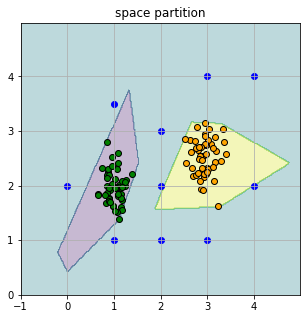

In [38]:
temp, X, Y = make_grid_data()
space_partition(temp, X, Y, net_o, net_g, Blue, Orange, Green)